# Linear Algebra With Numpy

Juan Diego Perez Navarro
Universidad Tecnológica de Bolívar


In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Manipulating matrices

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

Aclaración:

``` python
A@A != A**2
```

Si bien parece ilógico, el motivo no es culpa de las matemáticas, ni nada del estilo, realmente es culpa de Numpy. Puesto que la razón por la cual lo anterior no es cierto, es el mismo del que `A@A != A*A`, en el caso del primero, se hace una multiplicación matricial, que es lo que se espera dado el contexto del ejercicio, pero cuando se hace la segunda (`A**2` o `A*A`) lo que se hace es multiplicar cada posición de la primera matriz con la segunda, es decir, la posición (0, 0) de la primera con la (0, 0) de la segunda, luego (0, 1) con la (0, 1) de la segunda, y eso está mal en este caso, quizás en otros contextos sea más útil esta segunda opción que la primera.

In [28]:
A = np.array([
    [1, -1],
    [2, 1]
])

result = A@A - 2*A + 3
print(result)

[[0 3]
 [3 0]]


## Solving Matrix equations

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$


In [19]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

b = np.array([-1, 2, 1])

# `np.linalg.solve(a, b)` es la función para resolver ecuaciones de la forma
# ax = b, donde a es la matriz de coeficientes, x es el vector de incógnitas y b
# es el vector de resultados.
result = np.linalg.solve(B, b)
print(f"x = {result}")

# Confirmar que el resultado es correcto
# con ``np.allclose(a, b)` se compara si dos arreglos son iguales, con una
# tolerancia dada.
print(f"Bx = {(tmp := np.dot(B, result))}")
print(f"Bx = b? {np.allclose(tmp, b)}")

x = [-0.25892857  0.40178571  0.28571429]
Bx = [-1.  2.  1.]
Bx = b? True


## Matrix inversion and determinants

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


In [ ]:
B_inverse = np.linalg.inv(B)
det_B = np.linalg.det(B)

print(f"Determinante de B: {det_B}")
print(f"\nInversa de B: \n{B_inverse}")
print(f"\nEstá bien? B * B^1 = I  =>  \n{(tmp := np.dot(B, B_inverse))}")
print(np.allclose(tmp, np.eye(3)))  # Con np.eye(n) se crea una matriz identidad de nxn

Determinante de B: -336.0

Inversa de B: 
[[ 6.25000000e-02 -1.84523810e-01  1.72619048e-01]
 [-6.25000000e-02  1.36904762e-01  6.54761905e-02]
 [-1.09511795e-17  2.38095238e-01 -1.90476190e-01]]

Está bien? B * B^1 = I  =>  
[[ 1.00000000e+00  0.00000000e+00  1.11022302e-16]
 [ 7.55253758e-19  1.00000000e+00  8.32667268e-17]
 [ 4.45599717e-17 -3.33066907e-16  1.00000000e+00]]
True


## Rotations

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.


In [15]:
points = np.array([
    [-1, 0, 1, -1],
    [-1, 1, -1, -1]   
])

In [16]:
# Here is the function
def rotation_matrix(theta_degrees: float) -> np.ndarray:
    """
    Return the rotation matrix for a given angle theta in degrees.
    """
    theta_rad = np.deg2rad(theta_degrees)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


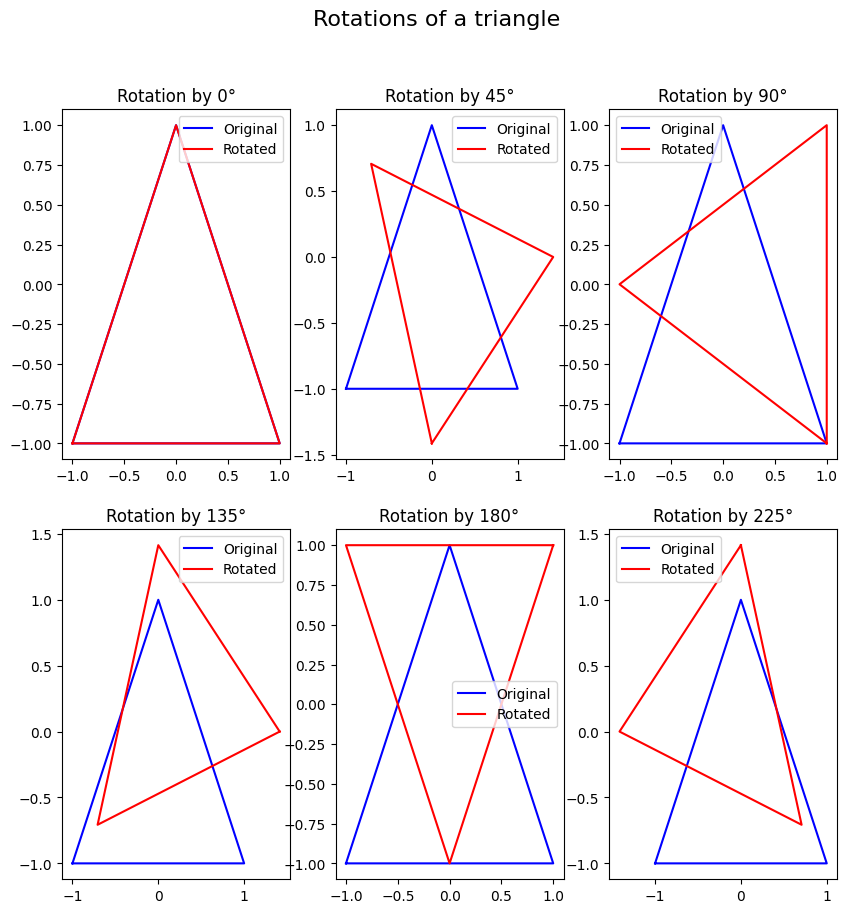

In [30]:
grid = (2, 3)  # grid of subplots
fig, axes = plt.subplots(*grid, figsize=(10, 10))
axes_flat = axes.flat
degrees = [i * 45 for i in range(len(axes_flat))] # make rotations every 45° (change if you want)

for degrees, ax in zip(degrees, axes_flat):
    R = rotation_matrix(degrees)
    points_rotated = np.dot(R, points)  # R @ points
    ax.plot(points[0], points[1], "b-", label="Original")
    ax.plot(points_rotated[0], points_rotated[1], "r-", label="Rotated")
    
    ax.set_title(f"Rotation by {degrees}°")
    ax.legend()

fig.suptitle("Rotations of a triangle", fontsize=16)
plt.show()